In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(self.weights, inputs) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in tqdm(range(epochs)):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias += learning_rate * error * self.sigmoid_derivative(prediction)

            # Calcular el error promedio por epoch
            train_error_by_epoch.append(train_error_acum / X_train.shape[0])

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)  # Corregido a self.predict

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_by_epoch.append(val_error_acum / X_validation.shape[0])

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento y el error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b', label='Error de entrenamiento')
        plt.plot(range(epochs), val_error_by_epoch, '-r', label='Error de validación')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento y Validación por Epoch')
        plt.legend()
        plt.show()

In [3]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
train_ratio = 0.8  # Proporción de los datos para entrenamiento

# Tamaños de entrenamiento y validación ajustados
train_size = int(N_samples * train_ratio)
N_validation = N_samples - train_size

# Generar datos aleatorios para X
X = np.random.randint(0, 2, (N_samples, 2))

# Calcular Y usando la lógica AND
Y = np.bitwise_and(X[:, 0], X[:, 1])

X_train = X[:train_size]
Y_train = Y[:train_size]

X_validation = X[train_size:]
Y_validation = Y[train_size:]

# Visualizar algunas muestras
print("X_data (primeras 5 muestras):")
print(X_train[:5])

print("Y_data (primeras 5 muestras):")
print(Y_train[:5])

X_data (primeras 5 muestras):
[[0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]]
Y_data (primeras 5 muestras):
[0 1 0 0 0]


In [4]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=2)

  2%|▏         | 2/100 [00:00<00:07, 13.81it/s]

epoch: 0 | train error: 292.7524786494091 | val error: 31.698660852370878


 16%|█▌        | 16/100 [00:00<00:03, 24.40it/s]

epoch: 10 | train error: 10.015228769655959 | val error: 2.386018349706424


 25%|██▌       | 25/100 [00:01<00:02, 26.97it/s]

epoch: 20 | train error: 4.841399364298449 | val error: 1.1837121107203752


 34%|███▍      | 34/100 [00:01<00:02, 27.51it/s]

epoch: 30 | train error: 3.1661543385181887 | val error: 0.7809966276409824


 43%|████▎     | 43/100 [00:01<00:02, 23.94it/s]

epoch: 40 | train error: 2.3448387394872516 | val error: 0.5809778596562722


 56%|█████▌    | 56/100 [00:02<00:01, 24.80it/s]

epoch: 50 | train error: 1.8589093684447908 | val error: 0.46180974267233


 66%|██████▌   | 66/100 [00:02<00:01, 27.56it/s]

epoch: 60 | train error: 1.5383778818923528 | val error: 0.3828595982667653


 72%|███████▏  | 72/100 [00:02<00:01, 25.08it/s]

epoch: 70 | train error: 1.311342262838674 | val error: 0.32677072418430486


 85%|████████▌ | 85/100 [00:03<00:00, 25.17it/s]

epoch: 80 | train error: 1.1422304491594604 | val error: 0.28490052751460304


 94%|█████████▍| 94/100 [00:03<00:00, 25.65it/s]

epoch: 90 | train error: 1.0114528965884002 | val error: 0.2524675641134296


100%|██████████| 100/100 [00:04<00:00, 24.56it/s]


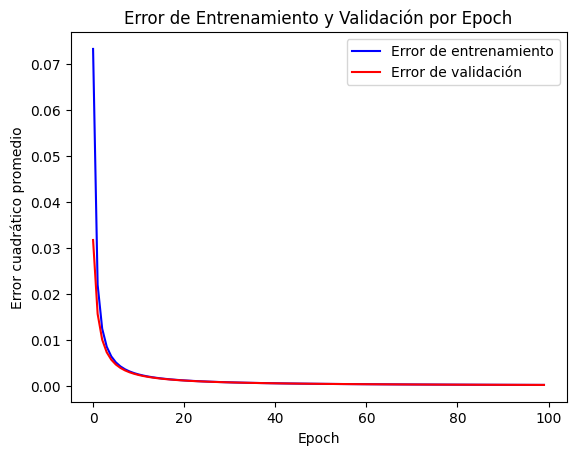

In [5]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [6]:
# Validar el modelo


## generar las predicciones
## a completar

## Calcula la matriz de confusión
## a completar

## Visualiza la matriz de confusión
## a completar